# **Predict stock prices with LSTM in PyTorch**


This guided project is based off of the [Build a recurrent neural network using Pytorch](https://developer.ibm.com/tutorials/build-a-recurrent-neural-network-pytorch/?mhsrc=ibmsearch_a&mhq=#learning-objectives0) tutorial on [IBM Developer](https://developer.ibm.com/), authored by Dhivya Lakshminarayanan and Samaya Madhavan.


In this guided project, your goal is to create a basic model that can predict a stock's value using daily Open, High, Low, and Close values. Because the stock market can be extremely volatile, there are many factors that can influence and contribute to a stock's value. This tutorial uses the following parameters for the stock data.

- **Open**: The stock's price when the market opens.
- **High**: The highest price at which a stock is trading during market hours.
- **Low**: The lowest price at which a stock is trading during market hours.
- **Close**: The stock's price when the market closes. This price is used by financial institutions as the value of a stock on a particular day because it takes into consideration all of the day's events and any fluctuations that might have occurred during the market.

The overall importance of the Close value and its use as a benchmark for a stock's daily value indicates that this value is the one to use in the prediction. To accomplish this, you can build a model that uses Long Short-Term Memory (LSTM), an RNN technique, to store and analyze large sets of time series data.


## Introduction
### Recurrent neural network
*<strong>Recurrent neural networks</strong>*, or RNNs, are widely used in a variety of mediums. RNNs leverage sequential data to make predictions. **Sequential memory** makes it easier for the neural network to recognize patterns and replicate the input. To achieve learning through sequential memory, a **feedforward neural network** with looping mechanisms is implemented. 

There are *three* types of layers: **input, hidden, and output**. There are loops that pass previous information forward, allowing the model to *sequentially* store and learn the data. The complexity of a hidden state is based on how much “historic” information is being stored, it is a representation of all previous steps. When training a model, once there is a prediction from a given output, a **loss function** is used to determine the error between the predicted output and real output. The model is trained through back propagation. The weight of each node in the neural network is adjusted with their corresponding gradient that is calculated during **back propagation**. 


The advantage of using sequential data to successfully predict certain outcomes is especially relevant when analyzing **time series data**. 

### [Long Short-Term Memory](https://ieeexplore.ieee.org/abstract/document/6795963)

Recurrent backpropagation can be very time-consuming due to insufficient and decaying error backflow. To solve this issue, a type of RNN called **Long Short-Term Memory (LSTM)** is used. [**LSTMs**](https://developer.ibm.com/tutorials/iot-deep-learning-anomaly-detection-1/) are able to keep track of long term dependencies by using gradients to modify the model, rather than backpropogations. These attributes are especially advantageous when examining **time series data**. The more historical data there is, the better the model can train, producing the most accurate outputs. 

An LSTM has an internal state variable that is modified based on weights and biases through operation gates. Traditionally, an LSTM is comprised of three operation gates: the forget gate, input gate, and output gate. The architecture of long-short term memory is dependent on $tanh$ and $sigmoid$ functions implemented in the network. The $tanh$ function ensures that the values in the network remain between -1 and 1 while the $sigmoid$ function regulates whether data should be remembered or forgotten. Furthermore, 

The mathematical representations of each gate are as follows:

<strong>Forget Gate</strong>: $$f_t = \sigma(w_f*[h_{t-1},x_t] + b_f)$$

<strong>Input Gate</strong>: $$i_t = \sigma(w_f*[h_{t-1},x_t] + b_i)$$

<strong>Output Gate</strong>: $$O_t = \sigma(w_f*[h_{t-1},x_t] + b_o)$$

Where:  
* $w_f$ = weight matrix between forget and input gate
* $h_{t-1}$ = previous hidden state
* $x_t$ = input
* $b_f$ = connection bias at forget gate 
* $b_i$ = connection bias at input gate 
* $b_o$ = connection bias at output gate 
* $\sigma$ = the sigmoid function

Each gate modifies the input in a different way. The forget gate determines what data is relevant to keep and what information can be "forgotten". The input gate analyzes what information needs to be added to the current step, and the output gate finalizes the proceeding hidden state. Each of these gates allows for sequential data to be efficiently stored and analyzed, allowing for an accurate predictive model to be developed. 

[***Source:** *S. Hochreiter and J. Schmidhuber, "Long Short-Term Memory," in Neural Computation, vol. 9, no. 8, pp. 1735-1780, 15 Nov. 1997, doi: 10.1162/neco.1997.9.8.1735.*](https://ieeexplore.ieee.org/abstract/document/6795963)

## Objectives

After completing this lab, you are able to:

 - Build an LSTM using PyTorch.
 - Train an LSTM model and evaluate the model with metrics such as mean squared error.

----

## Setup
For this lab, you use the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`pytorch`](https://pytorch.org/docs/stable/torch.html) to train and build the layers of neural networks.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries
The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You must run the following cell__ to install them:

In [1]:
%%capture
%pip install torch=="2.3.0"
%pip install pandas=="2.2.2"
%pip install matplotlib=="3.8.4"
%pip install scikit-learn=="1.4.2"

### Importing required libraries

*This step could take **several minutes**, please be patient.*

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

## Read and load the data

We will be loading a dataset on stock prices using daily Open, High, Low, and Close values.

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/g5XM0-gTrOquyZcBxcJAfw/StockData.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,Date,Open,High,Low,Close
0,2018-03-27,173.68,175.15,166.92,168.340
1,2018-03-26,168.07,173.10,166.44,172.770
2,2018-03-23,168.39,169.92,164.94,164.940
3,2018-03-22,170.00,172.68,168.60,168.845
4,2018-03-21,175.04,175.09,171.26,171.270


First, let examine the data.

In [5]:
stock_data = df
# Convert the date column into a Datetime object:
stock_data['Date'] = pd.to_datetime(df.Date)
print("Information about the dataset", end = "\n")
print(stock_data.info())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9400 non-null   datetime64[ns]
 1   Open    9400 non-null   float64       
 2   High    9400 non-null   float64       
 3   Low     9400 non-null   float64       
 4   Close   9400 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 367.3 KB
None


We can see that there are a total of 5 columns, the columns we want to input into the model are the last four columns: index 1-4.

By printing the first and last 5 elements, we can see that the data is in inverse order. The most recent data stored at the beginning of the set and the oldest data is at the end. For our model, we need to input the data from oldest to most recent. The Pandas method "sort_values" can be used to sort the data in chronological order.

In [6]:
print("First five elements in the dataset", end = "\n")
print(stock_data.head(5))
print("Last five elements in the dataset", end = "\n")
print(stock_data.tail(5))

First five elements in the dataset
        Date    Open    High     Low    Close
0 2018-03-27  173.68  175.15  166.92  168.340
1 2018-03-26  168.07  173.10  166.44  172.770
2 2018-03-23  168.39  169.92  164.94  164.940
3 2018-03-22  170.00  172.68  168.60  168.845
4 2018-03-21  175.04  175.09  171.26  171.270
Last five elements in the dataset
           Date   Open   High    Low  Close
9395 1980-12-18  26.63  26.75  26.63  26.63
9396 1980-12-17  25.87  26.00  25.87  25.87
9397 1980-12-16  25.37  25.37  25.25  25.25
9398 1980-12-15  27.38  27.38  27.25  27.25
9399 1980-12-12  28.75  28.87  28.75  28.75


After applying the "sort_values" method, we can use the "head" method to print the first five data points. Our data is now in the correct order.  

In [7]:
stock_data = stock_data.sort_values(by="Date")
print(stock_data.head())

           Date   Open   High    Low  Close
9399 1980-12-12  28.75  28.87  28.75  28.75
9398 1980-12-15  27.38  27.38  27.25  27.25
9397 1980-12-16  25.37  25.37  25.25  25.25
9396 1980-12-17  25.87  26.00  25.87  25.87
9395 1980-12-18  26.63  26.75  26.63  26.63


To create the multivariate model, we can create an array containing only the variables we want to input. We no longer need the date or index column as the data has already been ordered.

## Scale the data

In [8]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

       High    Low   Open  Close
9399  28.87  28.75  28.75  28.75
9398  27.38  27.25  27.38  27.25
9397  25.37  25.25  25.37  25.25
9396  26.00  25.87  25.87  25.87
9395  26.75  26.63  26.63  26.63


After we have isolated the target variables, the next step is to normalize the values by representing them as a value between -1 and 1. This allows us to make the data uniform. This means, irrespective of the range it falls under, each data point will have the same impact on the model. 

Note that normally, we should not expose the test data to the scaler. However, the scaler is just a min max scaler, so the only pertinent information that is leaked are the highest and lowest stock prices. In this case, we can assume that it has negligible effect.

In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.94884358 -0.94844388 -0.94899391 -0.94863261]
 [-0.95313783 -0.95280073 -0.95295751 -0.95297352]
 [-0.95893076 -0.95860987 -0.95877273 -0.95876139]
 [-0.95711507 -0.95680904 -0.95732616 -0.95696715]
 [-0.95495353 -0.95460157 -0.95512737 -0.95476776]]


## Create test and training sets

Below, we have defined our train window as 7.

In [10]:
train_window = 7
import numpy as np
def create_in_out_sequences(price, tw):
    inout_seq = []
    L = len(price)
    print('Length = ', L)
    
    for i in range(L-tw):
        data_seq = price[i:i+tw]
        data_label = price[i+tw:i+tw+1][0][3]
        inout_seq.append((data_seq ,data_label))
    
    data = inout_seq;
    print('size of data : ', len(data))
    
    test_set_size = 20
    train_set_size = len(data) - (test_set_size);
    print('size of test : ', test_set_size)
    print('size of train : ', train_set_size)
    
    train = data[:train_set_size]
    test = data[train_set_size:]
    train = train[:-(tw-1)]
    return train, test
    
train,test = create_in_out_sequences(price, train_window)

Length =  9400
size of data :  9393
size of test :  20
size of train :  9373


The `create_in_out_sequences` method creates labels for the dataset and isolates the datapoints we are inputting into the model, taking into account the training and test size and returns the training and test sets.

Let us print the first five elements of the test data and the last five elements of the train set to confirm its formatting.

In [11]:
print(test[0])
print(train[-1])

(array([[-0.52820808, -0.53303223, -0.53350981, -0.53283172],
       [-0.52982203, -0.53404883, -0.53440669, -0.5345102 ],
       [-0.53022552, -0.5352397 , -0.53215004, -0.53676747],
       [-0.53071547, -0.5332065 , -0.53512997, -0.53233975],
       [-0.52581598, -0.52789114, -0.5297198 , -0.52378816],
       [-0.51503711, -0.52013593, -0.52196618, -0.51390537],
       [-0.51189567, -0.51447202, -0.51401004, -0.51558385]]), -0.5163652148748373)
(array([[-0.56112112, -0.56992463, -0.56034371, -0.57013457],
       [-0.56803804, -0.58165473, -0.56843004, -0.58234698],
       [-0.57700122, -0.59556763, -0.57774595, -0.58046592],
       [-0.55970891, -0.5744514 , -0.57360876, -0.56096079],
       [-0.55723035, -0.56242648, -0.56362742, -0.55624367],
       [-0.54918942, -0.55885386, -0.56045943, -0.54747504],
       [-0.53319403, -0.54107789, -0.54094519, -0.53121111]]), -0.5328317175517292)


We can see that the data type of the train data is an array, and the data is all normalized. 

## Define the LSTM and forward method

This is the LSTM method. The number of inputs included in the model is 4 to represent the Open, High, Low, and Close values that we are feeding into the model.

In [12]:
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                       torch.zeros(1,1,self.hidden_layer_size),
                      )
        lstm_out, hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

- `self.hidden_layer_size` stores the size of the hidden layer, in this case, defaulted to 100.

- `self.lstm` initializes an LSTM layer. The LSTM takes input sequences of size input_size and outputs sequences of size hidden_layer_size.

- `self.linear` initializes a fully connected linear layer. It maps the LSTM output to the desired output_size.

- The `forward` method takes an input sequence and produces a prediction.

In [13]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

The following method allows us to predict the values using the trained model. 

In [14]:
model.eval()
actual = []
pred = []

for seq, labels in test:
    seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
    labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
    actual.append(labels.item())
    with torch.no_grad():
        pred.append(model(seq).item())

actual = np.array(actual)
pred = np.array(pred)

Next, our aim is to convert the predicted and actual data into tensors. 

In [15]:
pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

We can print the data to confirm that this it is formatted with the correct data type. 

In [16]:
print(pred)
print(actual)

tensor([0.0566, 0.0566, 0.0564, 0.0564, 0.0565, 0.0565, 0.0565, 0.0566, 0.0566,
        0.0565, 0.0564, 0.0564, 0.0564, 0.0564, 0.0564, 0.0565, 0.0565, 0.0565,
        0.0565, 0.0566])
tensor([-0.5164, -0.5254, -0.5219, -0.5201, -0.5206, -0.5253, -0.5198, -0.5110,
        -0.5059, -0.5110, -0.5154, -0.5148, -0.5167, -0.5245, -0.5247, -0.5362,
        -0.5432, -0.5545, -0.5318, -0.5447])


There are 20 individual tensors in both the predicted and actual sets. As we recall, previously, we defined the variable "test_set_size" as 20 in the `create_inout_sequence` method. These values represent the predicted and actual Close Values for the last (most recent) 20 days.  

Finally, to better understand and analyze the accuracy of the model's predictive values, we need to convert the normalized values into thier scalar form. 

In [17]:
import numpy as np
pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(pred)])
print(pred_new[:,3])

[376.12088842 376.09744201 376.0354057  376.04339967 376.061715
 376.08038305 376.08999899 376.09801871 376.09699919 376.08858041
 376.04938292 376.03906928 376.04234925 376.04964552 376.03295215
 376.05817758 376.06000293 376.07243285 376.08857913 376.1077402 ]


In [18]:
actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(actual)])
print(actual_new[:,3])

[178.11999474 174.99999256 176.21000958 176.81999212 176.67000924
 175.03000149 176.94000725 179.97999249 181.71999569 179.97000324
 178.44000078 178.65000152 178.0199993  175.2999995  175.24000223
 171.27000783 168.84501005 164.93999725 172.77000135 168.34000729]


## Evaluate the model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_new, pred_new)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mean_squared_error(actual_new, pred_new))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 50.16422671840759
Root Mean Squared Error (RMSE): 100.35019536539454


The model did a good job of predicting the Close Value of the stock. We can represent these values visually to see how close they are.

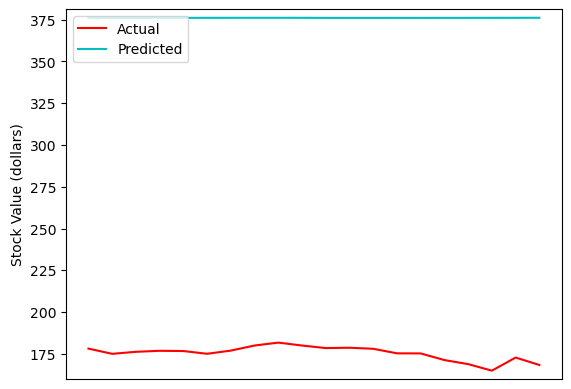

In [20]:
fig, ax = plt.subplots()

ax.plot(actual_new[:,3], 'r-', label='Actual')
ax.plot(pred_new[:,3], 'c-', label='Predicted')

ax.set_ylabel('Stock Value (dollars)')

ax.set_ylim(min(min(actual_new[:,3]), min(pred_new[:,3])) - 5, max(max(actual_new[:,3]), max(pred_new[:,3])) + 5)
plt.xticks([])

ax.legend(loc='upper left')

plt.show()

We can also plot the difference between the Actual and Predicted value. 

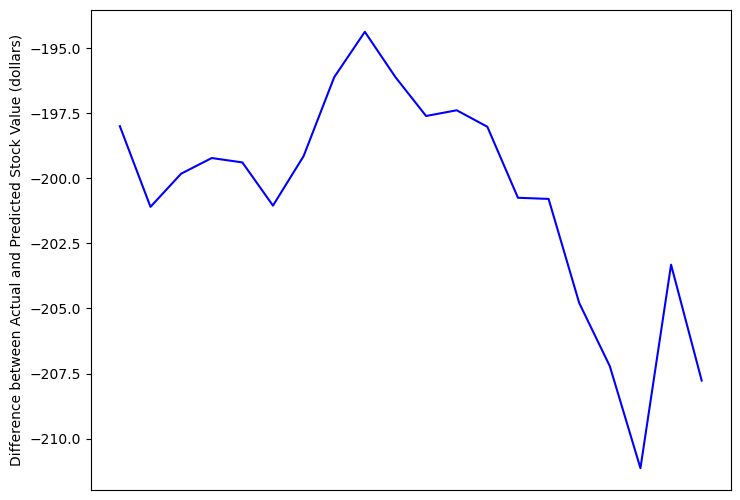

In [21]:
difference = actual_new - pred_new
fig = plt.figure()
diffGraph = fig.add_axes([0,0,1,1])
diffGraph.plot(difference[:, 3], 'b')
diffGraph.set_ylabel('Difference between Actual and Predicted Stock Value (dollars)')
plt.xticks([])
plt.show()

From this plot, the predicted value often seems to be lower than the actual value.